# Geovisualization with PySAL



## Introduction

When te [Python Spatial Analysis Library](https://github.com/pysal), `PySAL`, was originally planned, the intention was to focus on the computational aspects of exploratory spatial data analysis and spatial econometric methods, while relying on existing GIS packages and visualization libraries for visualization of computations. Indeed, we have partnered with [esri](https://geodacenter.asu.edu/arc_pysal) and [QGIS](http://planet.qgis.org/planet/tag/pysal/ ) towards this end.

However, over time we have received many requests for supporting basic geovisualization within PySAL so that the step of having to interoperate with an exertnal package can be avoided, thereby increasing the efficiency of the spatial analytical workflow.

In 2018 we started building the [`splot`](https://gist.github.com/slumnitz/a86ef4a5b48b1b5fac41e91cfd05fff2) package which connects spatial analysis done in PySAL to popular visualisation toolkits like [`matplotlib`](https://matplotlib.org). It provides users quick access to visualise PySAL objects, offering different views on spatial analysis workflows. Ultimately, `splot` facilitates the creation of both static plots ready for publication and interactive visualisations for quick iteration and spatial data exploration.

In this notebook, we demonstrate several approaches towards a particular subset of geovisualization methods, namely **choropleth maps**. We start with with a exploratory workflow introducing mapclassify and geopandas to create different choropleth classifications and maps for quick exploratory data analysis. We then introduce the [`splot`](https://splot.readthedocs.io/en/latest/) package at the example of **Value-by-Alpha choropleth mapping**, where no other dependencies beyond PySAL are required. The idea here is to support quick generation of different views of your data to complement the statistical and econometric work in PySAL. Once your work has progressed to the publication stage, we point you to additional resources that can be used for publication quality output and interactive visualization.

We then move on to consider two other packages that can be used in conjunction with PySAL for choropleth mapping:

- folium
- bokeh





### PySAL Map Classifiers


In [13]:
from pysal.viz import mapclassify

In [14]:
shp_link = 'data/texas.shp'
gdf = gpd.read_file(shp_link)

In [17]:
hr90 = gdf['HR90']
hr90q5 = mapclassify.Quantiles(hr90, k=5)
hr90q5

               Quantiles                
 
Lower            Upper             Count
         x[i] <=  2.421               51
 2.421 < x[i] <=  5.652               51
 5.652 < x[i] <=  8.510               50
 8.510 < x[i] <= 12.571               51
12.571 < x[i] <= 43.516               51

In [18]:
hr90q4 = mapclassify.Quantiles(hr90, k=4)
hr90q4

               Quantiles                
 
Lower            Upper             Count
         x[i] <=  3.918               64
 3.918 < x[i] <=  7.232               63
 7.232 < x[i] <= 11.414               63
11.414 < x[i] <= 43.516               64

In [19]:
hr90e5 = mapclassify.Equal_Interval(hr90, k=5)
hr90e5

              Equal Interval             
 
Lower            Upper              Count
         x[i] <=  8.703               157
 8.703 < x[i] <= 17.406                76
17.406 < x[i] <= 26.110                16
26.110 < x[i] <= 34.813                 2
34.813 < x[i] <= 43.516                 3

In [20]:
hr90fj5 = mapclassify.Fisher_Jenks(hr90, k=5)
hr90fj5

               Fisher_Jenks              
 
Lower            Upper              Count
         x[i] <=  3.156                55
 3.156 < x[i] <=  8.846               104
 8.846 < x[i] <= 15.881                64
15.881 < x[i] <= 27.640                27
27.640 < x[i] <= 43.516                 4

In [21]:
hr90fj5.adcm # measure of fit: Absolute deviation around class means

352.10763138100003

In [22]:
hr90q5.adcm # the lower, counts in class are more similar

361.5413784392

In [23]:
hr90e5.adcm

614.5109370421006

In [24]:
hr90fj5.yb[0:10] # what bin each value is placed in

array([0, 0, 3, 0, 1, 0, 0, 0, 0, 1])

In [25]:
hr90fj5.bins # upper bounds of each bin

array([ 3.15613527,  8.84642604, 15.88088069, 27.63957988, 43.51610096])

## GeoPandas

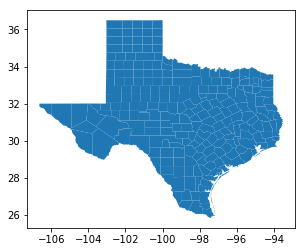

In [26]:
import geopandas as gpd
shp_link = "data/texas.shp"
tx = gpd.read_file(shp_link)
tx.plot()

In [27]:
type(tx)

geopandas.geodataframe.GeoDataFrame

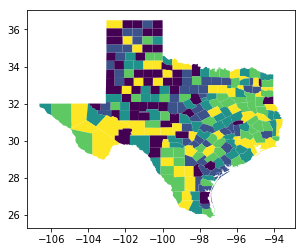

In [28]:
tx.plot(column='HR90', scheme='QUANTILES') # uses pysal classifier under the hood

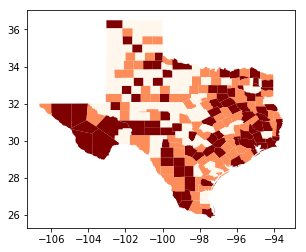

In [29]:
tx.plot(column='HR90', scheme='QUANTILES', k=3, cmap='OrRd') # we need a continuous color map

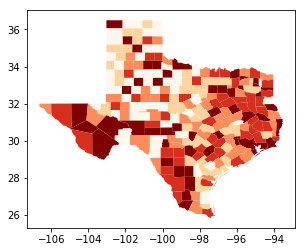

In [30]:
tx.plot(column='HR90', scheme='QUANTILES', k=5, cmap='OrRd') # bump up to quintiles

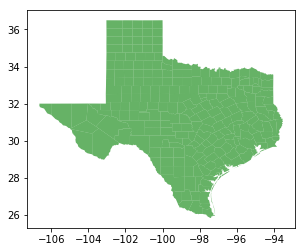

In [33]:
tx.plot(color='green', alpha=0.6) # explore options, polygon fills, alpha values

In [32]:
?? gdf.plot

Signature:  gdf.plot(*args, **kwargs)
Docstring:
Plot a GeoDataFrame.

Generate a plot of a GeoDataFrame with matplotlib.  If a
column is specified, the plot coloring will be based on values
in that column.

Parameters
----------
df : GeoDataFrame
    The GeoDataFrame to be plotted.  Currently Polygon,
    MultiPolygon, LineString, MultiLineString and Point
    geometries can be plotted.
column : str, np.array, pd.Series (default None)
    The name of the dataframe column, np.array, or pd.Series to be plotted.
    If np.array or pd.Series are used then it must have same length as
    dataframe. Values are used to color the plot. Ignored if `color` is
    also set.
cmap : str (default None)
    The name of a colormap recognized by matplotlib.
color : str (default None)
    If specified, all objects will be colored uniformly.
ax : matplotlib.pyplot.Artist (default None)
    axes on which to draw the plot
categorical : bool (default False)
    If False, cmap will reflect numerical values 

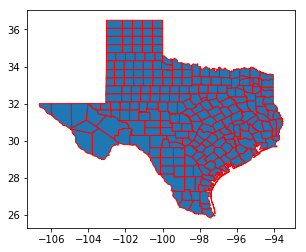

In [35]:
tx.plot(edgecolor='red') # border

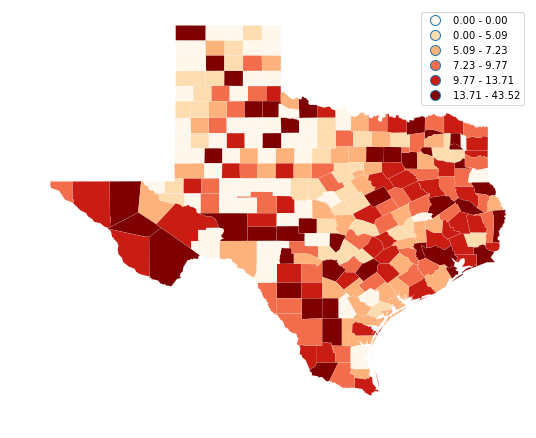

In [53]:
import matplotlib.pyplot as plt # make plot larger

f, ax = plt.subplots(1, figsize=(9, 9))
tx.plot(column='HR90', scheme='QUANTILES', \
        k=6, cmap='OrRd', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

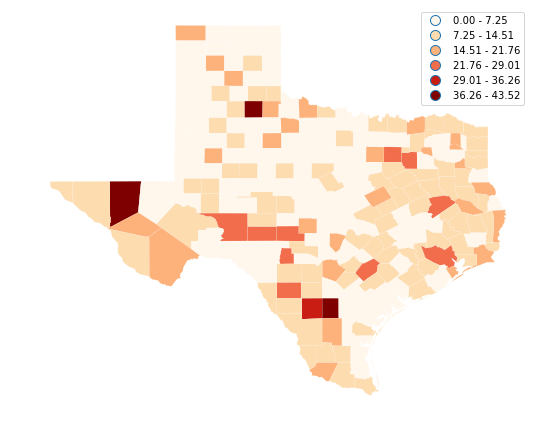

In [54]:
f, ax = plt.subplots(1, figsize=(9, 9))
tx.plot(column='HR90', scheme='equal_interval', \
        k=6, cmap='OrRd', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

## splot - PySAL visualization package

In 2018 we started building the [`splot`](https://gist.github.com/slumnitz/a86ef4a5b48b1b5fac41e91cfd05fff2) package which connects spatial analysis done in the [Python Spatial Analysis Library](https://github.com/pysal), `PySAL`, to popular visualisation toolkits like [`matplotlib`](https://matplotlib.org). It provides users quick access to visualise PySAL objects, offering different views on spatial analysis workflows. Ultimately, `splot` facilitates the creation of both static plots ready for publication and interactive visualisations for quick iteration and spatial data exploration.

`splot` can be imported as it's own package or is part of the `pysal` metapackage found under:

In [ ]:
from pysal.viz import splot

Building on top of our experiences, `splot`'s functionality can be accessed in two main ways: 
* First, basic `splot` visualisations are exposed as `.plot` methods on PySAL objects. 
* Scond, all visualisations can be found and called using a `splot.'PySAL_sub-package'` namespace, depending on the previously analysed object that needs to be visualised (e.g.`pysal.viz.splot.giddy`).

We recommend 

* [Chris Moffitt’s Effectively Using Matplotlib](https://pbpython.com/effective-matplotlib.html) as a crash course and
* [Nicolas P. Rougier’s Matplotlib tutorial](https://github.com/rougier/matplotlib-tutorial) for an in-depth dive into matplotlib

### Examples

#### access through `.plot()`

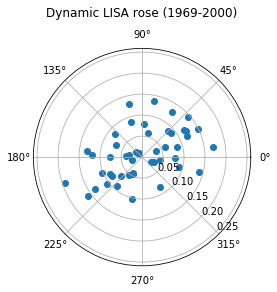

In [8]:
from pysal.explore.giddy.directional import Rose
from pysal.lib import examples
from pysal.lib.weights.contiguity import Queen
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    
# Retrieve files and prepare data
shp_link = examples.get_path('us48.shp')
df = gpd.read_file(shp_link)
income_table = pd.read_csv(examples.get_path("usjoin.csv"))

# Calculate relative values and merge
for year in range(1969, 2010):
    income_table[str(year) + '_rel'] = (
        income_table[str(year)] / income_table[str(year)].mean())
gdf = df.merge(income_table,left_on='STATE_NAME',right_on='Name')
 
# Calculate spatial weights and data for two points in time
w = Queen.from_dataframe(gdf)
w.transform = 'r'
y1 = gdf['1969_rel'].values
y2 = gdf['2000_rel'].values

# Calculate rose Object
Y = np.array([y1, y2]).T
rose = Rose(Y, w, k=5)

# Plot
fig, ax = rose.plot()
ax.set_title('Dynamic LISA rose (1969-2000)\n')
plt.show()

#### access through pysal.viz.splot

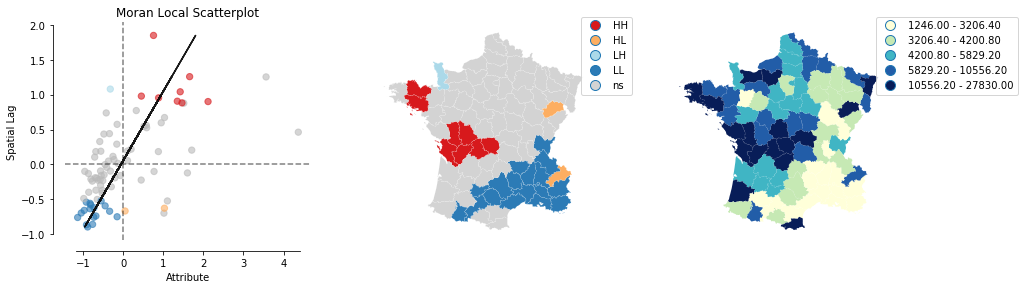

In [9]:
from pysal.explore.esda.moran import Moran_Local
from pysal.viz.splot.esda import plot_local_autocorrelation
from pysal.lib import examples
from pysal.lib.weights.contiguity import Queen
import matplotlib.pyplot as plt

# Data preparation and spatial analysis
link_to_data = examples.get_path('Guerry.shp')
gdf = gpd.read_file(link_to_data)
y = gdf['Donatns'].values
w = Queen.from_dataframe(gdf)
w.transform = 'r'
moran_loc = Moran_Local(y, w)

# plotting
plot_local_autocorrelation(moran_loc, gdf, 'Donatns')
plt.show()

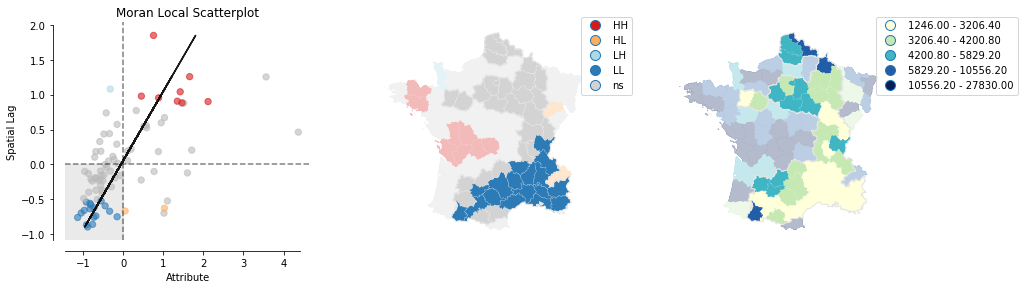

In [10]:
plot_local_autocorrelation(moran_loc, gdf, 'Donatns', quadrant=3)
plt.show()

## Value-by-Alpha Choropleth

#### splot.mapping

In addition to object and `PySAL` sub-package specific analytical visualizations `splot` offers a range of `.mapping` and visualization utility functionality. This functionality can be extended in future to be `splot`'s designated core functionality, offering classic visual diagnostic tools for spatial analysis. Map and cartographic visualisations, for example, provide great potential to examine spatial processes, dynamics and relationships with only minor additional underlying data processing. Furthermore, this mapping fucntionality is not only advantageous to use on its own but a great addition to several `PySAL` sub-packages like `mapclassify`.

`splot` functionality currently offers:
* **Value-by-Alpha map functionality** including:
    * `value_by_alpha_cmap()`
    * `vba_choropleth()`
    * `vba_legend()`
* **`mapclassify` value binning** with `mapclassify_bin()`
* **Colormap utilities** including:
    * `shift_colormap()`
    * `truncate_colormap()`

#### Visual analytics using: vba_choropleth()

In a nutshell, a Value-by-Alpha Choropleth is a bivariate choropleth that uses the values of the second input variable `y` as a transparency mask, determining how much of the choropleth displaying the values of a first variable `x` is shown. In comparison to a cartogram, Value-By-Alpha choropleths will not distort shapes and sizes but modify the alpha channel (transparency) of polygons according to the second input variable `y`. A Value-by-Alpha Choropleth is therefore another powerful tool to examine relationships of two variable in space.

In [59]:
from pysal.viz.splot.mapping import vba_choropleth

Load example data into a `geopandas.GeoDataFrame` and inspect column names. In this example we will use the `columbus.shp` file containing neighborhood crime data of 1980.

In [60]:
link_to_data = examples.get_path('columbus.shp')
gdf = gpd.read_file(link_to_data)
gdf.columns

Index(['AREA', 'PERIMETER', 'COLUMBUS_', 'COLUMBUS_I', 'POLYID', 'NEIG',
       'HOVAL', 'INC', 'CRIME', 'OPEN', 'PLUMB', 'DISCBD', 'X', 'Y', 'NSA',
       'NSB', 'EW', 'CP', 'THOUS', 'NEIGNO', 'geometry'],
      dtype='object')

In [61]:
x = gdf['HOVAL'].values
y = gdf['CRIME'].values

We will plot a Value-by-Alpha Choropleth with `x` defining the rgb values and `y` defining the alpha value. For comparison we plot a choropleth of `x` with `gdf.plot()`:

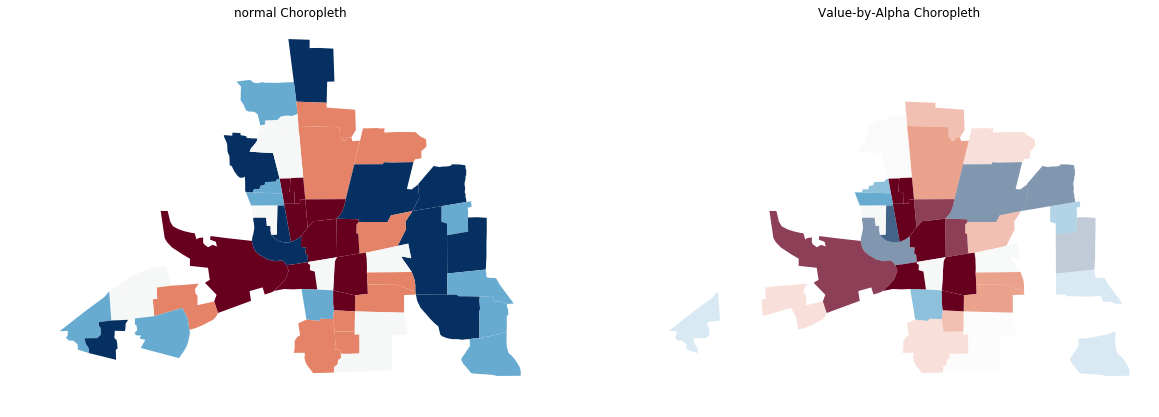

In [62]:
# Create new figure
fig, axs = plt.subplots(1,2, figsize=(20,10))

# use gdf.plot() to create regular choropleth
gdf.plot(column='HOVAL', scheme='quantiles', cmap='RdBu', ax=axs[0])

# use vba_choropleth to create Value-by-Alpha Choropleth
vba_choropleth(x, y, gdf, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='RdBu', ax=axs[1])

# set figure style
axs[0].set_title('normal Choropleth')
axs[0].set_axis_off()
axs[1].set_title('Value-by-Alpha Choropleth')

# plot
plt.show()

You can see the original choropleth is fading into transparency wherever there is a high `y` value.

You can use the option to bin or classify your `x` and `y` values. `splot` uses mapclassify to bin your data and displays the new color and alpha ranges:

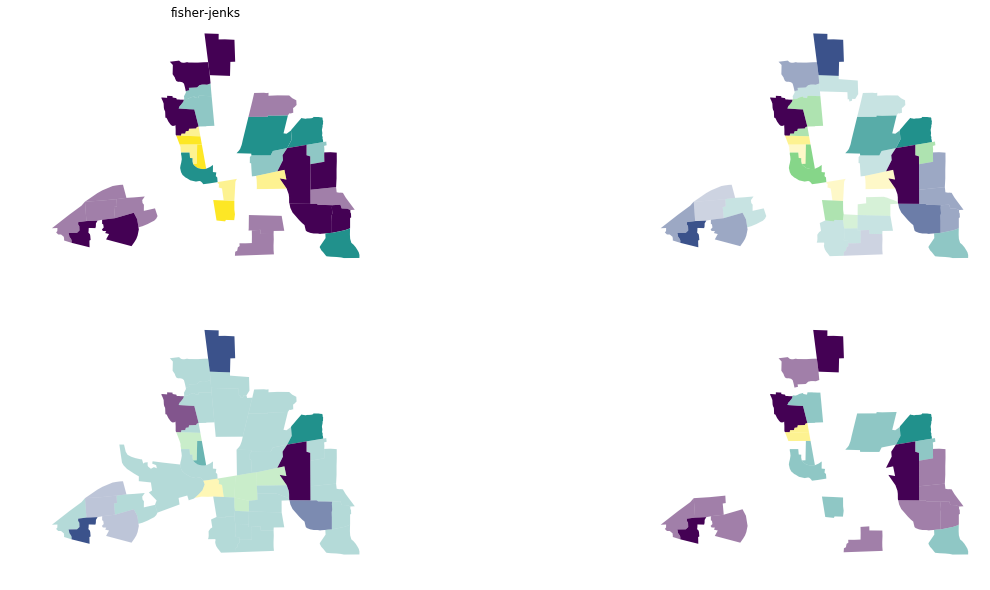

In [64]:
# Create new figure
fig, axs = plt.subplots(2,2, figsize=(20,10))

# classifier quantiles
vba_choropleth(y, x, gdf, cmap='viridis', ax = axs[0,0],
               rgb_mapclassify=dict(classifier='quantiles', k=3), 
               alpha_mapclassify=dict(classifier='quantiles', k=3))
axs[0,0].set_title('quantiles')

# classifier natural_breaks
vba_choropleth(y, x, gdf, cmap='viridis', ax = axs[0,1],
               rgb_mapclassify=dict(classifier='natural_breaks'), 
               alpha_mapclassify=dict(classifier='natural_breaks'))
axs[0,0].set_title('natural-breakes')

# classifier std_mean
vba_choropleth(y, x, gdf, cmap='viridis', ax = axs[1,0],
               rgb_mapclassify=dict(classifier='std_mean'), 
               alpha_mapclassify=dict(classifier='std_mean'))
axs[0,0].set_title('std-mean')

# classifier fisher_jenks
vba_choropleth(y, x, gdf, cmap='viridis', ax = axs[1,1],
               rgb_mapclassify=dict(classifier='fisher_jenks', k=3), 
               alpha_mapclassify=dict(classifier='fisher_jenks', k=3))
axs[0,0].set_title('fisher-jenks')

plt.show()

Instead of using a colormap you can also pass a list of colors:

In [65]:
color_list = ['#a1dab4','#41b6c4','#225ea8']

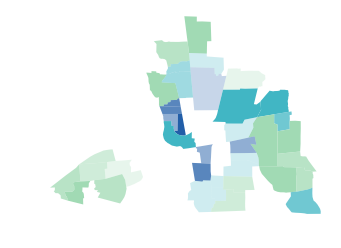

In [66]:
vba_choropleth(y, x, gdf, cmap=color_list,
               rgb_mapclassify=dict(classifier='quantiles', k=3), 
               alpha_mapclassify=dict(classifier='quantiles'))
plt.show()

Sometimes it is important in geospatial analysis to actually see the high values and let the small values fade out. With the `revert_alpha = True` argument, you can revert the transparency of the `y` values.

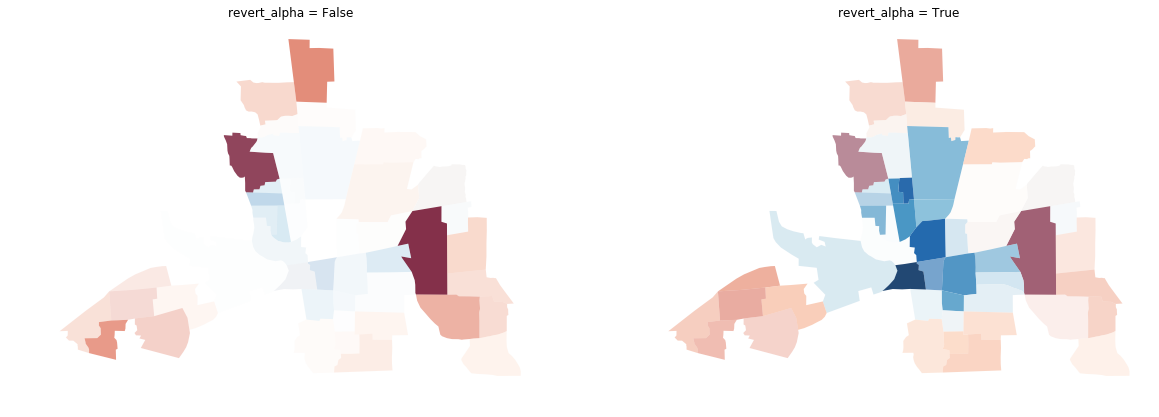

In [70]:
# create new figure
fig, axs = plt.subplots(1,2, figsize=(20,10))

# create a vba_choropleth
vba_choropleth(y, x, gdf, cmap='RdBu',
               divergent=False, ax=axs[0])

# set divergent to True
vba_choropleth(y, x, gdf, cmap='RdBu',
               divergent=True, ax=axs[1])

# set figure style
axs[0].set_title('revert_alpha = False')
axs[0].set_axis_off()
axs[1].set_title('revert_alpha = True')

# plot
plt.show()

If your values are classified, you have the option to add a legend to your map.

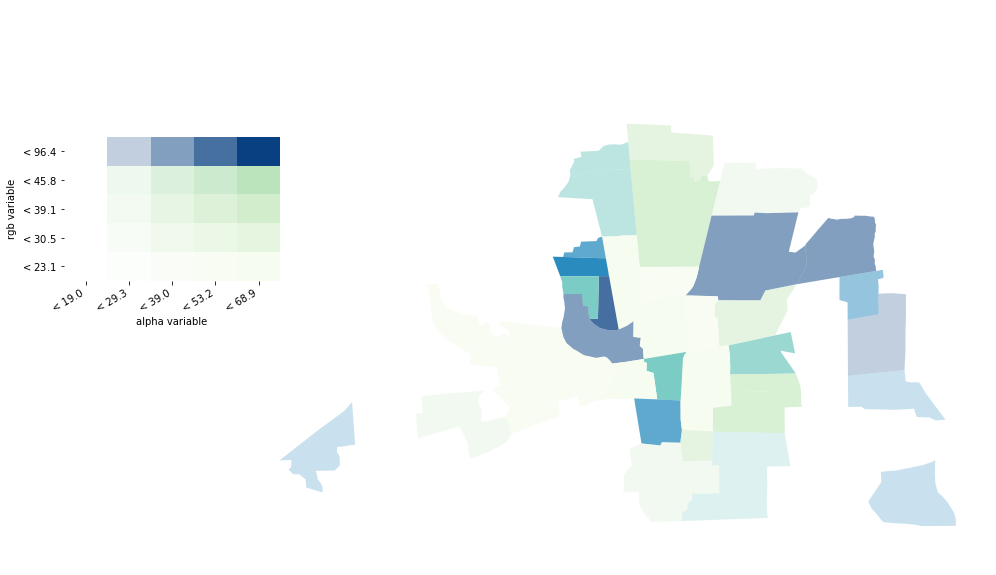

In [68]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
vba_choropleth(x, y, gdf,
               alpha_mapclassify=dict(classifier='quantiles', k=5),
               rgb_mapclassify=dict(classifier='quantiles', k=5),
               legend=True, ax=ax)
plt.show()

# Exercises

1. Explore `pysal.viz.mapclassify.` (hint: use tab completion) to select a new classifier (different from the ones in this notebook). Using the same data as in exercise 1, apply this classifier and create a choropleth using geopandas.
2. Create yor own Value-by-Alpha choropleth for San Diego using `pysa.viz.splot.mapping`.

## Bokeh

[website](http://bokeh.pydata.org/en/latest/)

In [ ]:
import bokeh
bokeh.__version__

In [ ]:
from collections import OrderedDict

#from bokeh.sampledata import us_counties, unemployment
from bokeh.plotting import figure, show, output_notebook, ColumnDataSource, output_file
from bokeh.models import HoverTool

#from bokeh.charts import Scatter, output_file, show

In [ ]:
def gpd_bokeh(df):
    """Convert geometries from geopandas to bokeh format"""
    nan = float('nan')
    lons = []
    lats = []
    for i,shape in enumerate(df.geometry.values):
        if shape.geom_type == 'MultiPolygon':
            gx = []
            gy = []
            ng = len(shape.geoms) - 1
            for j,member in enumerate(shape.geoms):
                xy = np.array(list(member.exterior.coords))
                xs = xy[:,0].tolist()
                ys = xy[:,1].tolist()
                gx.extend(xs)
                gy.extend(ys)
                if j < ng:
                    gx.append(nan)
                    gy.append(nan)
            lons.append(gx)
            lats.append(gy)
                
        else:     
            xy = np.array(list(shape.exterior.coords))
            xs = xy[:,0].tolist()
            ys = xy[:,1].tolist()
            lons.append(xs)
            lats.append(ys) 

    return lons,lats

In [ ]:
lons, lats = gpd_bokeh(tx)

In [ ]:
p = figure(title="Texas", toolbar_location='left',
          plot_width=1100, plot_height=700)
p.patches(lons, lats, fill_alpha=0.7, #fill_color=state_colors,
         line_color="#884444", line_width=2, line_alpha=0.3)
output_file('choropleth.html', title="choropleth.py example")
show(p)

In [ ]:
bwr = plt.cm.get_cmap('Reds')
bwr(.76)
c5 = [bwr(c) for c in [0.2, 0.4, 0.6, 0.7, 1.0]]
classes = bins_q5.yb
colors = [c5[i] for i in classes]


In [ ]:
colors5 = ["#F1EEF6", "#D4B9DA", "#C994C7", "#DF65B0", "#DD1C77"]
colors = [colors5[i] for i in classes]

p = figure(title="Texas HR90 Quintiles", toolbar_location='left',
          plot_width=1100, plot_height=700)
p.patches(lons, lats, fill_alpha=0.7, fill_color=colors,
         line_color="#884444", line_width=2, line_alpha=0.3)
output_file('choropleth.html', title="choropleth.py example")
show(p)

### Hover 



In [ ]:
from bokeh.models import HoverTool
from bokeh.plotting import figure, show, output_file, ColumnDataSource

In [ ]:
source = ColumnDataSource(data=dict(
        x=lons,
        y=lats,
        color=colors,
        name=tx.NAME,
        rate=HR90
    ))

TOOLS = "pan, wheel_zoom, box_zoom, reset, hover, save"
p = figure(title="Texas Homicide 1990 (Quintiles)", tools=TOOLS,
          plot_width=900, plot_height=900)

p.patches('x', 'y', source=source,
         fill_color='color', fill_alpha=0.7,
         line_color='white', line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = 'follow_mouse'
hover.tooltips = [
    ("Name", "@name"),
    ("Homicide rate", "@rate"),
    ("(Long, Lat)", "($x, $y)"),
]


output_file("hr90.html", title="hr90.py example")
show(p)

In [ ]:
import pandas as pd
#import pysal as ps
import pysal.model.spreg
from pysal.explore.esda.moran import Moran_Local
from bokeh.plotting import figure
from bokeh.models import (GeoJSONDataSource, ColumnDataSource,
                          CategoricalColorMapper, Span,
                          HoverTool, Legend)
from bokeh.layouts import gridplot
from bokeh import palettes

from pysal.viz.splot._viz_utils import (bin_labels_choropleth, add_legend,
                         mask_local_auto, calc_data_aspect)

In [ ]:
def plot_choropleth(df, attribute, title=None, plot_width=500,
                    plot_height=500, method='quantiles',
                    k=5, reverse_colors=False, tools='', region_column=''):
    '''
    Plot Choropleth colored according to attribute
    Parameters
    ----------
    df : Geopandas dataframe
        Dataframe containign relevant shapes and attribute values.
    attribute : str
        Name of column containing attribute values of interest.
    title : str, optional
        Title of map. Default title=None
    plot_width : int, optional
        Width dimension of the figure in screen units/ pixels.
        Default = 500
    plot_height : int, optional
        Height dimension of the figure in screen units/ pixels.
        Default = 500
    method : str, optional
        Classification method to be used. Options supported:
        * 'quantiles' (default)
        * 'fisher-jenks'
        * 'equal-interval'
    k : int, optional
        Number of bins, assigning values to. Default k=5
    reverse_colors: boolean
        Reverses the color palette to show lightest colors for
        lowest values. Default reverse_colors=False
    tools : str, optional
        Tools used for bokeh plotting. Default = ''
    region_column : str, optional
        Column name containing region descpriptions/ names or polygone ids.
        Default = ''.
    Returns
    -------
    fig : Bokeh Figure instance
        Figure of Choropleth
    Examples
    --------
    >>> import libpysal.api as lp
    >>> from libpysal import examples
    >>> import geopandas as gpd
    >>> import esda
    >>> from splot.bk import plot_choropleth
    >>> from bokeh.io import show
    >>> link = examples.get_path('columbus.shp')
    >>> df = gpd.read_file(link)
    >>> w = lp.Queen.from_dataframe(df)
    >>> w.transform = 'r'
    >>> TOOLS = "tap,help"
    >>> fig = plot_choropleth(df, 'HOVAL', title='columbus',
    ...                       reverse_colors=True, tools=TOOLS)
    >>> show(fig)
    '''
    # We're adding columns, do that on a copy rather than on the users' input
    df = df.copy()

    # Extract attribute values from df
    attribute_values = df[attribute].values

    # Create bin labels with bin_labels_choropleth()
    bin_labels = bin_labels_choropleth(df, attribute_values, method, k)

    # Initialize GeoJSONDataSource
    geo_source = GeoJSONDataSource(geojson=df.to_json())

    fig = _plot_choropleth_fig(geo_source, attribute, bin_labels,
                               bounds=df.total_bounds,
                               region_column=region_column, title=title,
                               plot_width=plot_width, plot_height=plot_height,
                               method=method, k=k,
                               reverse_colors=reverse_colors,
                               tools=tools)
    return fig


def _plot_choropleth_fig(geo_source, attribute, bin_labels, bounds,
                         region_column='', title=None,
                         plot_width=500, plot_height=500, method='quantiles',
                         k=5, reverse_colors=False, tools=''):
    colors = palettes.YlGnBu[k]
    if reverse_colors is True:
        colors.reverse()  # lightest color for lowest values

    # make data aspect ration match the figure aspect ratio
    # to avoid map distortion (1km=1km)
    x_min, x_max, y_min, y_max = calc_data_aspect(plot_height, plot_width,
                                                  bounds)

    # Create figure
    fig = figure(title=title, plot_width=plot_width, plot_height=plot_height,
                 tools=tools, x_range=(x_min, x_max), y_range=(y_min, y_max))
    # The use of `nonselection_fill_*` shouldn't be necessary,
    # but currently it is. This looks like a bug in Bokeh
    # where gridplot plus taptool chooses the underlay from the figure
    # that is clicked and applies it to the other figure as well.
    fill_color = {'field': 'labels_choro',
                  'transform': CategoricalColorMapper(palette=colors,
                                                      factors=bin_labels)}
    fig.patches('xs', 'ys', fill_alpha=0.7, fill_color=fill_color,
                line_color='white', nonselection_fill_alpha=0.2,
                nonselection_fill_color=fill_color,
                selection_line_color='firebrick',
                selection_fill_color=fill_color,
                line_width=0.5, source=geo_source)

    # add hover tool
    if 'hover' in tools:
        hover = fig.select_one(HoverTool)
        hover.point_policy = "follow_mouse"
        hover.tooltips = [("Region", "@" + region_column),
                          ("Attribute", "@" + attribute + "{0.0}"),
                          ]

    # add legend with add_legend()
    add_legend(fig, bin_labels, colors)

    # change layout
    fig.xgrid.grid_line_color = None
    fig.ygrid.grid_line_color = None
    fig.axis.visible = None
    return fig


In [ ]:
from pysal.lib.weights.contiguity import Queen
from pysal.lib import examples
import geopandas as gpd
import esda
from bokeh.io import show
link = examples.get_path('columbus.shp')
df = gpd.read_file(link)
w = Queen.from_dataframe(df)
w.transform = 'r'
TOOLS = "tap,help"
fig = plot_choropleth(df, 'HOVAL', title='columbus',
                       reverse_colors=True, tools=TOOLS)
show(fig)

## Exercises

1. Using Bokeh, use PySALs Fisher Jenks classifier with k=10 to generate a choropleth map of the homicide rates in 1990 for Texas counties. Modify the hover tooltips so that
in addition to showing the Homicide rate, the rank of that rate is also shown.
2. Explore `ps.esda.mapclassify.` (hint: use tab completion) to select a new classifier (different from the ones in this notebook). Using the same data as in exercise 1, apply this classifier and create a choropleth using Bokeh.

## Solution

In [ ]:
# Exercise 1
fj10 = ps.Fisher_Jenks(HR90, k=10)
classes = fj10.yb

# palettes from https://github.com/bokeh/bokeh/blob/master/bokeh/palettes.py
colors10 =['#000000', '#1c1c1c', '#383838', '#555555', '#717171', '#8d8d8d', '#aaaaaa', '#c6c6c6', '#e2e2e2', '#ffffff']
colors = [colors10[9-i] for i in classes] # reverse the colors lighter to darker

In [ ]:
source = ColumnDataSource(data=dict(
        x=lons,
        y=lats,
        color=colors,
        name=tx.NAME,
        rate=HR90,
        classid=classes
    ))

TOOLS = "pan, wheel_zoom, box_zoom, reset, hover, save"
p = figure(title="Texas Homicide 1990 (Fisher Jenks k=10)", tools=TOOLS,
          plot_width=900, plot_height=900)

p.patches('x', 'y', source=source,
         fill_color='color', fill_alpha=0.7,
         line_color='white', line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = 'follow_mouse'
hover.tooltips = [
    ("Name", "@name"),
    ("Homicide rate", "@rate"),
    ("Class","@classid"),
    ("(Long, Lat)", "($x, $y)"),
]


output_file("hr90.html", title="hr90.py example")
show(p)

In [ ]:
# Exercise 2
mb10 = ps.Maximum_Breaks(HR90, k=10)
classes = mb10.yb

# palettes from https://github.com/bokeh/bokeh/blob/master/bokeh/palettes.py
colors10 =['#000000', '#1c1c1c', '#383838', '#555555', '#717171', '#8d8d8d', '#aaaaaa', '#c6c6c6', '#e2e2e2', '#ffffff']
colors = [colors10[9-i] for i in classes] # reverse the colors lighter to darker

In [ ]:
source = ColumnDataSource(data=dict(
        x=lons,
        y=lats,
        color=colors,
        name=tx.NAME,
        rate=HR90,
        classid=classes
    ))

TOOLS = "pan, wheel_zoom, box_zoom, reset, hover, save"
p = figure(title="Texas Homicide 1990 (Maximum Breaks k=10)", tools=TOOLS,
          plot_width=900, plot_height=900)

p.patches('x', 'y', source=source,
         fill_color='color', fill_alpha=0.7,
         line_color='white', line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = 'follow_mouse'
hover.tooltips = [
    ("Name", "@name"),
    ("Homicide rate", "@rate"),
    ("Class","@classid"),
    ("(Long, Lat)", "($x, $y)"),
]


output_file("hr90.html", title="hr90.py example")
show(p)

In [ ]:
mb10

In [ ]:
ps.esda.mapclassify??